## HW5：微分方程的数值求解（ddl：11.23）
你的名字：寇皓

你的学号：2300011467


注意：
1. 请使用 Python 语言完成所有编程作业。
2. 允许并鼓励同学间合作，但严禁抄袭别人的代码，且严禁直接复制粘贴由人工智能生成的代码。
3. 请直接在题干后附加代码块和必要的公式，讨论等。
4. 作图请包含 X,Y 轴的标签，以及必要的图例。过多信息的缺失可能会导致丢分。

作业只需要在这个 jupyter notebook 里添加代码，并直接提交修改后的 jupyter notebook，文件请重命名为`姓名-学号-作业x`。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程；另外标注**致谢**，借助了**哪位同学或 ChatGPT 等工具**的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！

<font color='red'>**本次作业禁止调用现成的ODE、PDE求解工具**</font>

### 一、一维振子运动

本题中，你将借助课上学到的常微分方程的数值计算方法来研究一维振子的运动，这里我们研究的一维ODE的通用形式为：

$$ \frac{d^2x}{dt^2}+2\gamma\frac{dx}{dt}=f(x) + F(t) $$

其中$\gamma$是阻尼系数，$f(x)$是振子的恢复力，$F(t)$是外部的驱动力。

**(a)** 基于讲义上介绍的“引入预估修正的欧拉法”（也称作Heun方法）以及“四阶龙格-库塔方法”，我们可以分别编写名为`Heun`与`RK4`的两个函数：输入$\gamma$， $f$， $F$，初始位置$x_0=x(0)$，初始速度$v_0=\dot{x}(0)$，演化时间步长$h$和总步数$N$；输出解得的从$t=0$开始的离散运动方程$x(t)$、$v(t)$以及对应的时间序列$t=\{t_i\}^N_{i=0}$。

**提示：**
1. 请参考讲义4.1.2节中介绍的对于高阶常微分方程的处理方式；
2. 若用`np.linspace`创建时间序列，传递参数可以写为`(0, (N-1) * h, N)`或`(0, N * h, N, endpoint = False)`，从而确保格点位置与数量的正确。

* 引入速度作为中间量$v(t)=\dot{x}(t)$，写出将上面的二阶ODE改写为两个一阶ODE之后的形式。
* 分别给出两种方法下，从时刻$t_n$移动一个步长到$t_{n+1}$时，用于求得系统相应时间演化：$x_{n},v_{n}\rightarrow x_{n+1},v_{n+1}$的一系列表达式。

写成两个一阶ODE之后的形式为:

$\frac{dv}{dt}=-2\gamma v+f(x)+F(t)$,

$\frac{dx}{dt}=v$

Huen方法给出:

$x_{n+1}=x_n+hv_n+\frac{h^2}{2}(-2\gamma v_n+f(x_n)+F(t_n))$, 

$v_{n+1}=v_n+\frac{h}{2}[(1-2\gamma h)(-2\gamma v_n+f(x_n)+F(t_n))-2\gamma v_n+f(x_n+hv_n)+F(t_n+h)]$, 

RK4方法给出:

$\Delta x_{n,1}=hv_n$, 
$\Delta v_{n,1}=h(-2\gamma v_n+f(x_n)+F(t_n))$;

$\Delta x_{n,2}=h(v_n+\frac{1}{2}\Delta v_{n,1})$, 
$\Delta v_{n,2}=h(-2\gamma (v_n+\frac{1}{2}\Delta v_{n,1})+f(x_n+\frac{1}{2}\Delta x_{n,1})+F(t_n+\frac{1}{2}h))$;

$\Delta x_{n,3}=h(v_n+\frac{1}{2}\Delta v_{n,2})$,
$\Delta v_{n,3}=h(-2\gamma (v_n+\frac{1}{2}\Delta v_{n,2})+f(x_n+\frac{1}{2}\Delta x_{n,2})+F(t_n+\frac{1}{2}h))$;

$\Delta x_{n,4}=h(v_n+\Delta v_{n,3})$,
$\Delta v_{n,4}=h(-2\gamma (v_n+\Delta v_{n,3})+f(x_n+\Delta x_{n,3})+F(t_n+h))$;

$x_{n+1}=x_n+\frac{1}{6}\Delta x_{n,1}+\frac{1}{3}\Delta x_{n,2}+\frac{1}{3}\Delta x_{n,3}+\frac{1}{6}\Delta x_{n,4}$,
$v_{n+1}=v_n+\frac{1}{6}\Delta v_{n,1}+\frac{1}{3}\Delta v_{n,2}+\frac{1}{3}\Delta v_{n,3}+\frac{1}{6}\Delta v_{n,4}$.


* 根据你给出的表达式写出这两个函数。

In [73]:
import numpy as np
import matplotlib.pyplot as plt


def Heun(gamma: float, f, F, x0: float, v0: float, h: float, N: int):
    t_list = np.linspace(0, N * h, N, endpoint=False)
    x_list = np.zeros(N)
    v_list = np.zeros(N)

    x_list[0] = x0
    v_list[0] = v0

    for i in range(1, N):
        x_list[i] = x_list[i - 1] + h * v_list[i - 1] + h**2 / 2 * (-2 * gamma * v_list[i - 1] + f(x_list[i - 1] + F(t_list[i - 1])))
        v_list[i] = v_list[i - 1] + h / 2 * (
            (1 - 2 * gamma * h) * (-2 * gamma * v_list[i - 1] + f(x_list[i - 1]) + F(t_list[i - 1])) - 2 * gamma * v_list[i - 1] + f(x_list[i - 1] + h * v_list[i - 1]) + F(t_list[i - 1] + h)
        )
    return (t_list, x_list, v_list)


def RK4(gamma: float, f, F, x0: float, v0: float, h: float, N: int):
    t_list = np.linspace(0, N * h, N, endpoint=False)
    x_list = np.zeros(N)
    v_list = np.zeros(N)

    x_list[0] = x0
    v_list[0] = v0

    for i in range(1, N):
        dx1 = h * v_list[i - 1]
        dv1 = h * (-2 * gamma * v_list[i - 1] + f(x_list[i - 1]) + F(t_list[i - 1]))
        dx2 = h * (v_list[i - 1] + dv1 / 2)
        dv2 = h * (-2 * gamma * (v_list[i - 1] + dv1 / 2) + f(x_list[i - 1] + dx1 / 2) + F(t_list[i - 1] + h / 2))
        dx3 = h * (v_list[i - 1] + dv2 / 2)
        dv3 = h * (-2 * gamma * (v_list[i - 1] + dv2 / 2) + f(x_list[i - 1] + dx2 / 2) + F(t_list[i - 1] + h / 2))
        dx4 = h * (v_list[i - 1] + dv3)
        dv4 = h * (-2 * gamma * (v_list[i - 1] + dv3) + f(x_list[i - 1] + dx3) + F(t_list[i - 1] + h))

        x_list[i] = x_list[i - 1] + (dx1 + 2 * dx2 + 2 * dx3 + dx4) / 6
        v_list[i] = v_list[i - 1] + (dv1 + 2 * dv2 + 2 * dv3 + dv4) / 6

    return (t_list, x_list, v_list)

**(b)** 谐振子

我们先来看最简单的情况，无阻尼无驱动的一维谐振子：
$$ \gamma=0, \quad f(x)=-\omega^2x, \quad F(t)=0 $$

* 用你在上面写出的两个函数分别求出运动方程，我们取$x_0=0, v_0=10, h=0.01, N=2000, \omega=2\pi$。

* 作出两幅图：在第一幅图中画出两个$x(t)$随时间的变化曲线，在第二幅图中展示用两种方法分别得到的相图，亦即$x-v$曲线。

（对于这种简单的函数，在演化时间不是太长时两种方法都能较好地胜任，若无失误的话你应该能得到两幅图中曲线均基本重合的结果）

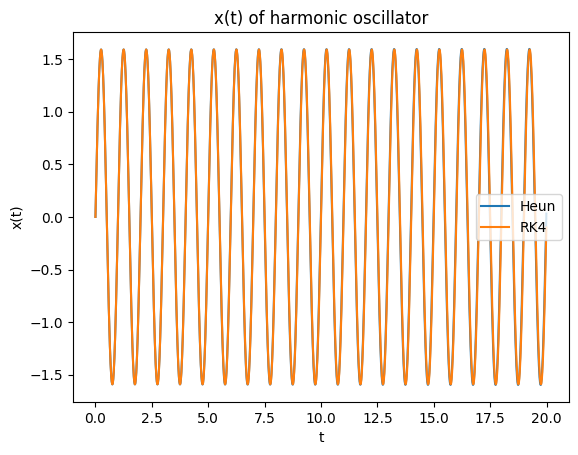

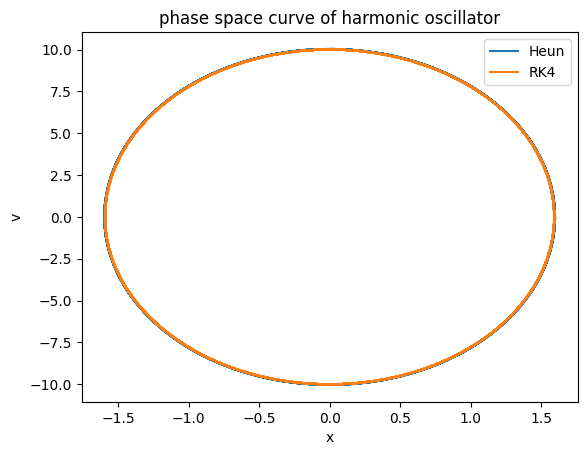

In [74]:
omega0 = 2 * np.pi
gamma = 0
f = lambda x: -(omega0**2) * x
F = lambda t: 0
N = 2000
h = 0.01
x0 = 0
v0 = 10

t_list_Heun, x_list_Heun, v_list_Heun = Heun(gamma, f, F, x0, v0, h, N)
t_list_RK4, x_list_RK4, v_list_RK4 = RK4(gamma, f, F, x0, v0, h, N)

plt.plot(t_list_Heun, x_list_Heun, label='Heun')
plt.plot(t_list_RK4, x_list_RK4, label='RK4')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('x(t) of harmonic oscillator')
plt.show()

plt.plot(x_list_Heun, v_list_Heun, label='Heun')
plt.plot(x_list_RK4, v_list_RK4, label='RK4')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.title('phase space curve of harmonic oscillator')
plt.show()

**(c)** 非谐振子

众所周知，我们在物理学中见到的谐振子模型，不管是经典的还是量子的，在绝大多数情况下都只是在平衡点附近对真实情况的一种近似，现实世界是个充满混沌的非线性系统。这里我们来考虑一个被称为杜芬振子（Duffing oscillator, [https://en.wikipedia.org/wiki/Duffing_equation](https://en.wikipedia.org/wiki/Duffing_equation)）的非谐振子模型：
$$ f(x)=-\alpha x-\beta x^3, \quad F(t)=\delta \cos{\omega_0 t} $$

* 本问中我们取$x_0=0, v_0=10, h=0.01, N=6000, \gamma=0.05, \alpha=(2\pi)^2, \beta=1.5, \delta=1, \omega_0=\pi$，同样地，用两种方法分别得到运动方程，并作出与 **(b)** 问要求一致的两幅图，两种方法的表现是否有显著差异？

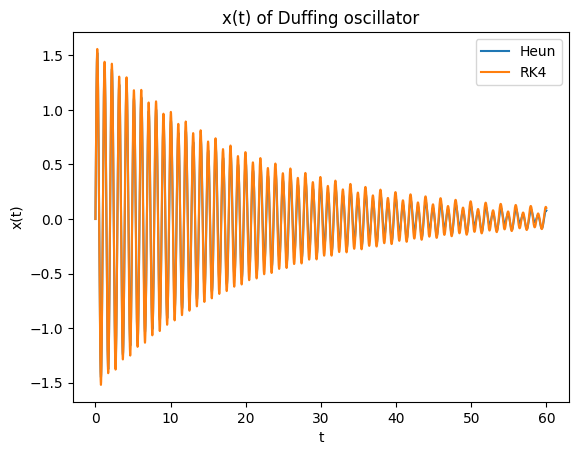

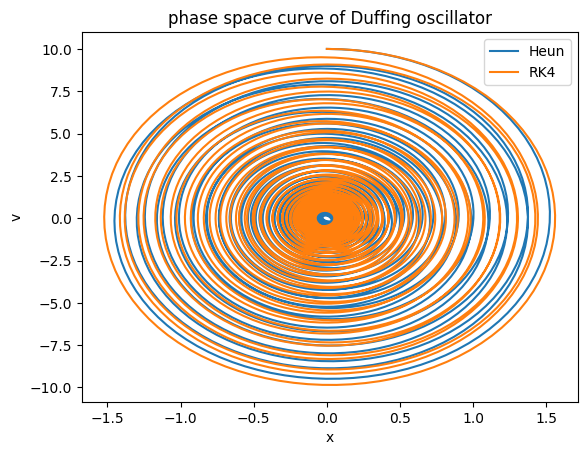

In [75]:
alpha = (2 * np.pi) ** 2
beta = 1.5
delta = 1
omega0 = np.pi
x0 = 0
v0 = 10
h = 0.01
N = 6000
gamma = 0.05

f = lambda x: -alpha * x - beta * np.power(x, 3)
F = lambda t: delta * np.cos(omega0 * t)

t_list_Heun, x_list_Heun, v_list_Heun = Heun(gamma, f, F, x0, v0, h, N)
t_list_RK4, x_list_RK4, v_list_RK4 = RK4(gamma, f, F, x0, v0, h, N)

plt.plot(t_list_Heun, x_list_Heun, label='Heun')
plt.plot(t_list_RK4, x_list_RK4, label='RK4')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('x(t) of Duffing oscillator')
plt.show()

plt.plot(x_list_Heun, v_list_Heun, label='Heun')
plt.plot(x_list_RK4, v_list_RK4, label='RK4')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.title('phase space curve of Duffing oscillator')
plt.show()

虽然从$x(t)$的图上来看，Heun和RK4两种算法得到的曲线比较重合，但是从相图上来看，两种方法在演化开始后不久就有了一些区别，差异较大且肉眼可辨。

事实上，关于杜芬振子，人们对它在$\gamma<0$下的行为也很感兴趣，这时系统处在混沌态。不过本题不会对其混沌性质作深入探讨，我们关心的是借助这一场景观察两个算法的表现。

* 改成取$\gamma=-0.05$，其余条件保持不变，再进行一次上面的计算，并且基于你得到的两幅图展开**对两种数值计算ODE方法**的简要讨论。（再次强调，你可以用`xlim`与`ylim`来截取足以清晰观察图中重要部分的图像窗口）

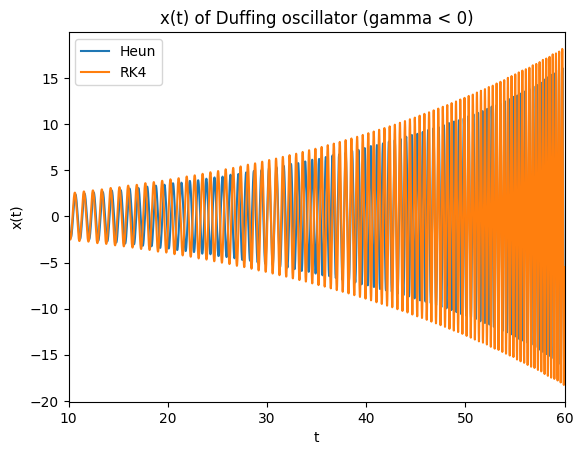

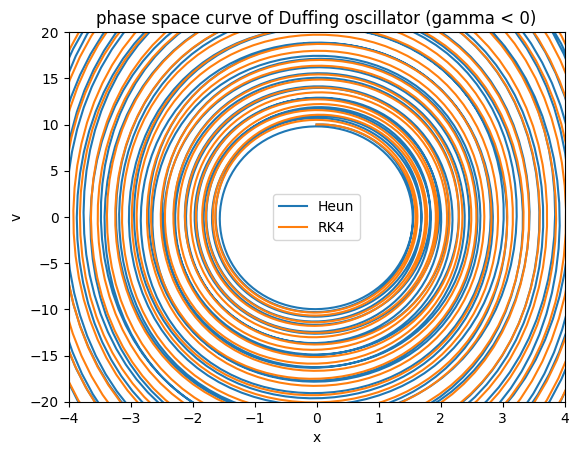

In [76]:
alpha = (2 * np.pi) ** 2
beta = 1.5
delta = 1
omega0 = np.pi
x0 = 0
v0 = 10
h = 0.01
N = 6000
gamma = -0.05

f = lambda x: -alpha * x - beta * np.power(x, 3)
F = lambda t: delta * np.cos(omega0 * t)

t_list_Heun, x_list_Heun, v_list_Heun = Heun(gamma, f, F, x0, v0, h, N)
t_list_RK4, x_list_RK4, v_list_RK4 = RK4(gamma, f, F, x0, v0, h, N)

plt.plot(t_list_Heun, x_list_Heun, label='Heun')
plt.plot(t_list_RK4, x_list_RK4, label='RK4')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('x(t) of Duffing oscillator (gamma < 0)')
plt.xlim(10, 60)
plt.show()

plt.plot(x_list_Heun, v_list_Heun, label='Heun')
plt.plot(x_list_RK4, v_list_RK4, label='RK4')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.title('phase space curve of Duffing oscillator (gamma < 0)')
plt.xlim(-4, 4)
plt.ylim(-20, 20)
plt.show()

原则上来说，RK4是4阶的算法，相较于Heun算法来说，其计算结果会更接近于真实的物理运动；而Heun方法相较于RK4方法偏差较大，从相空间来看，Heun方法的图像最内圈形成了整个圆，这在物理上不够合理。两种数值算法的偏离随着演化步数的增加越来越大，这是因为此时的系统是混沌的，系统不断有能量注入，扰动带来的影响会随时间的积累越来越大。同时，在这种混沌系统中，两种数值求解ODE的方法都不可避免地会快速积累误差，长时间的求解结果都是不够可信的。

下面是可以选做并在本次作业中额外加分的附加题（第二题 **(c)** 问同理）：

**Bonus(d)** 欧拉法及其改进版本相比4阶龙格-库塔法的劣势，从根本上说是因为前者是2阶算法，不过我们依然可以在Heun方法的基础上重复执行预估操作，有望让精度逐渐逼近2阶方法的上限，这也就是所谓的“$\text{P}(\text{EC})^k\text{E}$”模式，其中$k$是执行预测-评估操作的次数。

例如，对于一阶常微分方程$\frac{dy}{dx}=f(x,y)$，$\text{P}(\text{EC})^2\text{E}$模式的表达式可以写为：
$$
\left\{\begin{array}{l}
y^1_{n+1}=y_n+hf(x_{n}, y_{n}) \\
y^2_{n+1}=y_n+\frac{1}{2}h(f(x_n, y_n)+f(x_{n+1}, y^1_{n+1})) \\
y_{n+1}=y_n+\frac{1}{2}h(f(x_n, y_n)+f(x_{n+1}, y^2_{n+1}))
\end{array}\right.
$$

* 根据上述思路改写你之前实现Heun法的函数：额外添加一个输入参数k，使其实现$\text{P}(\text{EC})^k\text{E}$算法。

* 采用 **(c)** 问中第二小问的参数，在一张图中作出分别取k=2,3,4,5时计算出的相图；并在另一张图中作出取k=5时的相图和你此前用龙格-库塔法得到的相图；对这两幅图进行讨论。

（本问中你可能会遇到难以分辨各曲线轮廓的问题，这时可以考虑把截取窗口取为相图局部，只需能明确呈现出各曲线最外圈由内至外的顺序即可）

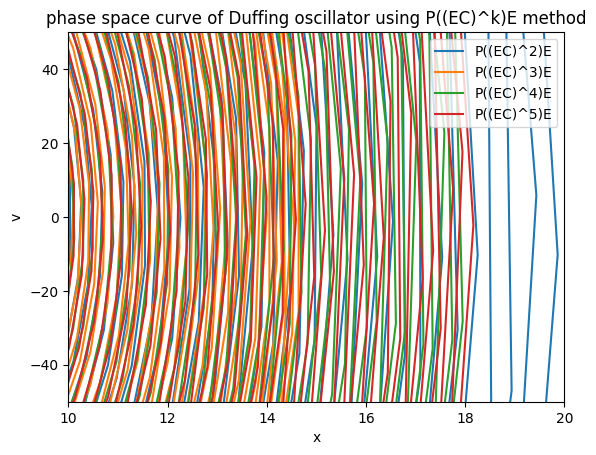

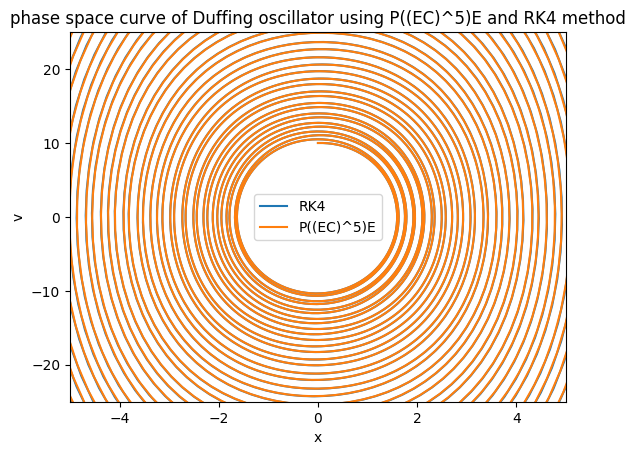

In [77]:
def Heunk(gamma: float, f, F, x0: float, v0: float, h: float, N: int, k: int):
    t_list = np.linspace(0, N * h, N, endpoint=False)
    x_list = np.zeros(N)
    v_list = np.zeros(N)

    x_list[0] = x0
    v_list[0] = v0

    for i in range(1, N):
        x_list[i] = x_list[i - 1] + h * v_list[i - 1]
        v_list[i] = v_list[i - 1] + h * (-2 * gamma * v_list[i - 1] + f(x_list[i - 1]) + F(t_list[i - 1]))
        for j in range(1, k):
            x_old = x_list[i]
            v_old = v_list[i]
            x_list[i] = x_list[i - 1] + h / 2 * (v_list[i - 1] + v_old)
            v_list[i] = v_list[i - 1] + h / 2 * (-2 * gamma * v_list[i - 1] + f(x_list[i - 1]) + F(t_list[i - 1]) - 2 * gamma * v_old + f(x_old) + F(t_list[i]))

    return (t_list, x_list, v_list)


alpha = (2 * np.pi) ** 2
beta = 1.5
delta = 1
omega0 = np.pi
x0 = 0
v0 = 10
h = 0.01
N = 6000
gamma = -0.05

f = lambda x: -alpha * x - beta * np.power(x, 3)
F = lambda t: delta * np.cos(omega0 * t)

t_list_Heun2, x_list_Heun2, v_list_Heun2 = Heunk(gamma, f, F, x0, v0, h, N, 2)
t_list_Heun3, x_list_Heun3, v_list_Heun3 = Heunk(gamma, f, F, x0, v0, h, N, 3)
t_list_Heun4, x_list_Heun4, v_list_Heun4 = Heunk(gamma, f, F, x0, v0, h, N, 4)
t_list_Heun5, x_list_Heun5, v_list_Heun5 = Heunk(gamma, f, F, x0, v0, h, N, 5)

plt.plot(x_list_Heun2, v_list_Heun2, label='P((EC)^2)E')
plt.plot(x_list_Heun3, v_list_Heun3, label='P((EC)^3)E')
plt.plot(x_list_Heun4, v_list_Heun4, label='P((EC)^4)E')
plt.plot(x_list_Heun5, v_list_Heun5, label='P((EC)^5)E')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.title('phase space curve of Duffing oscillator using P((EC)^k)E method')
plt.xlim(10, 20)
plt.ylim(-50, 50)
plt.show()

plt.plot(x_list_RK4, v_list_RK4, label='RK4')
plt.plot(x_list_Heun5, v_list_Heun5, label='P((EC)^5)E')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.title('phase space curve of Duffing oscillator using P((EC)^5)E and RK4 method')
plt.xlim(-5, 5)
plt.ylim(-25, 25)
plt.show()

可以发现，在使用不同阶数的$P(EC)^kE$模式算法时，演化结果确实有一定变化，当增加阶数到4至5阶时，用$P(EC)^kE$模式算法得到的结果趋于稳定，说明算法精度已经接近了2阶算法的上限。$P(EC)^5E$算法得到的结果和4阶的RK4算法得到的结果几乎相同，说明即使是2阶算法，在合适的迭代方式下也能得到降档精确的结果。

### 二、偏微分方程

**本题中，你可以随意调用合适的线性方程组求解工具。**

我们来通过有限差分法研究在《数学物理方法》课程中学过的一维波动方程：
$$
\frac{\partial^2\phi}{\partial t^2}-v^2\frac{\partial^2\phi}{\partial
  x^2}=0.
$$

边界条件：$\phi(x=0)=0,\phi(x=L)=0$。你可以想象成一根长度为$L$，两端固定的琴弦上波的传播。初始弦各处无振动，在$x=d$处对琴弦进行敲击，导致弦上各点存在一个初速度分布$\psi(x,t=0)$。即，初始条件为：
$$
\phi(x,t=0)=0,\quad  \psi(x,t=0) = \frac{\partial \phi}{\partial t}(x,t=0)= C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
$$

各参数取值为：$v=100$ m/s，$L=1$ m，$d=10$ cm，$C=1$ m/s，$\sigma=0.3$ m。 



**(a)** 本题中我们直接给出对函数作向前时间演化的表达式，这里同样需要先将方程转化为两组一阶PDE，于是在空间离散格点中方程变为：
$$
\begin{aligned}
\frac{\partial \phi_m}{\partial t} &= \psi_m \\
\frac{\partial \psi_m}{\partial t} &= v^2 \frac{\partial^2 \phi_m}{\partial x^2} = \frac{v^2}{a^2} (\phi_{m+1}+\phi_{m-1}-2\phi_m)
\end{aligned}
$$
在此基础上对时间显式向前传播，即为显式FTCS(Explicit FTCS)算法(上标$n$代表时间步，下标$m$代表空间划分的格点)：
$$
\begin{aligned}
\phi_m^{n+1} & =\phi_m^n+h \psi_m^n \\
\psi_m^{n+1} & =\psi_m^n+h \frac{v^2}{a^2}\left(\phi_{m-1}^n+\phi_{m+1}^n-2 \phi_m^n\right) .
\end{aligned}
$$


* 请编写显式FTCS算法，在空间划分上取间隔 $a=5$ mm，时间步长上取 $h=10^{-6}$ s，分别在四张图上画出$t=0.002,0.004,0.006,0.012$ s的琴弦波形图$\phi(x,t)$（本问中你不需要用`xlim`和`ylim`），留意这几幅图的纵坐标刻度，并对结果进行锐评。



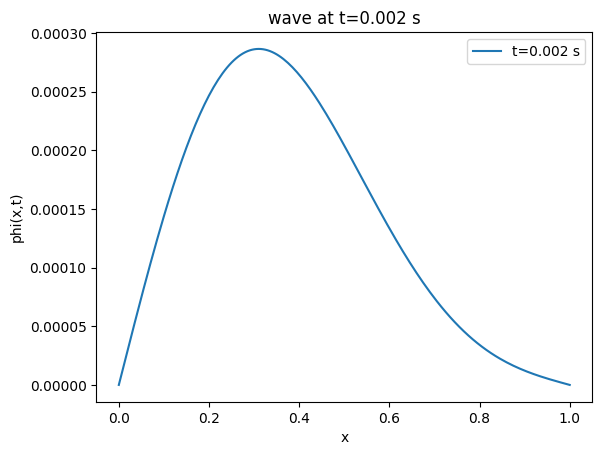

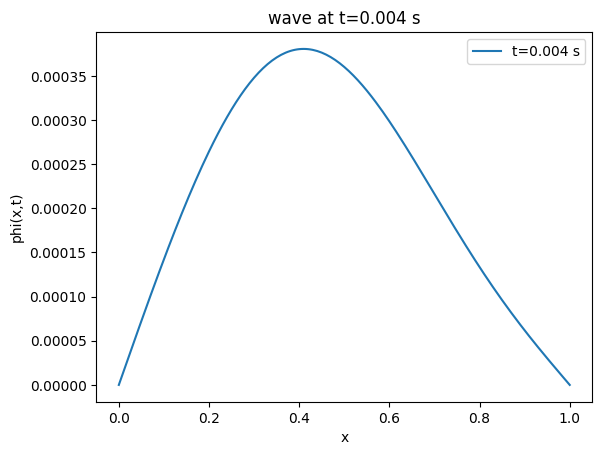

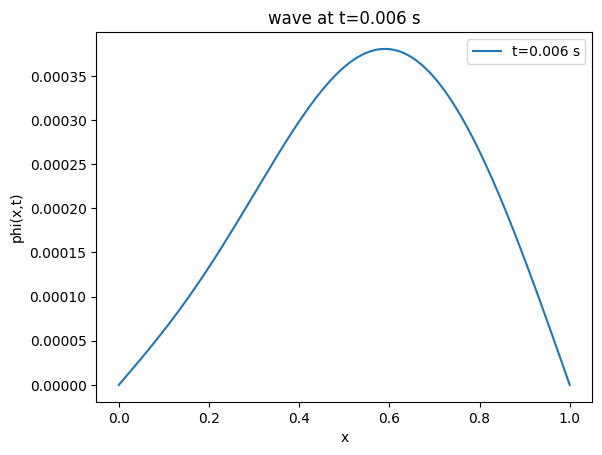

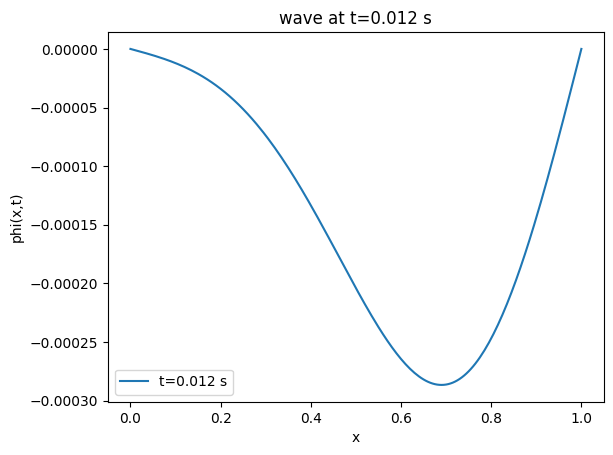

In [90]:
def ExplicitFTCS(v: float, x_initial: np.ndarray, v_initial: np.ndarray, a: float, h: float, N: int):
    t_list = np.linspace(0, N * h, N, endpoint=False)
    x_list = np.zeros((N, len(x_initial)))
    v_list = np.zeros((N, len(v_initial)))
    x_list[0] = x_initial
    v_list[0] = v_initial

    for i in range(1, N):
        x_list[i] = x_list[i - 1] + h * v_list[i - 1]
        for j in range(1, len(v_initial) - 1):
            v_list[i][j] = v_list[i - 1][j] + h * v**2 / a**2 * (x_list[i - 1][j + 1] - 2 * x_list[i - 1][j] + x_list[i - 1][j - 1])

    return (t_list, x_list, v_list)


C = 1
sigma = 0.3
d = 0.1
L = 1
a = 0.005
v = 100
h = 1e-6
tmax = 0.012
N = int(tmax / h)
N += 1

psi_function = lambda x: C * x * (L - x) * np.exp(-np.power(x - d, 2) / (2 * sigma**2)) / (L**2)
lattice = np.linspace(0, L, int(L / a) + 1)
x_initial = np.zeros(int(L / a) + 1)
v_initial = psi_function(lattice)

t_list_E_FTCS, x_list_E_FTCS, v_list_E_FTCS = ExplicitFTCS(v, x_initial, v_initial, a, h, N)

times = [0.002, 0.004, 0.006, 0.012]
indexes = []
for time in times:
    indexes.append(int(time / h))
for index in indexes:
    plt.plot(lattice, x_list_E_FTCS[index], label=f't={t_list_E_FTCS[index]} s')
    plt.xlabel('x')
    plt.ylabel('phi(x,t)')
    plt.legend()
    plt.title(f'wave at t={t_list_E_FTCS[index]} s')
    plt.show()



**(b)** 可以在理论上证明，显式FTCS算法对于波动方程**永远**是不稳定的。因此，波动方程必须通过其他的传播方法来求解。

和扩散方程类似，对这两个耦合的PDE也可以使用Crank-Nicolson方法，我们可以得到：
$$
\begin{aligned}
\phi_m^{n+1} & =\phi_m^n+\frac{h}{2} (\psi_m^{n+1} + \psi_m^{n}) \\
\psi_m^{n+1} & =\psi_m^n+h \frac{v^2}{2a^2}\left(\phi_{m-1}^{n+1}+\phi_{m+1}^{n+1}-2 \phi_m^{n+1}\right)+h \frac{v^2}{2a^2}\left(\phi_{m-1}^{n}+\phi_{m+1}^{n}-2 \phi_m^{n}\right) .
\end{aligned}
$$

* 请编写Crank-Nicolson算法，重复 **(a)** 问的模拟，但取$h=10^{-4}$ s，将你得到的结果和 **(a)** 问结果进行对比和锐评。

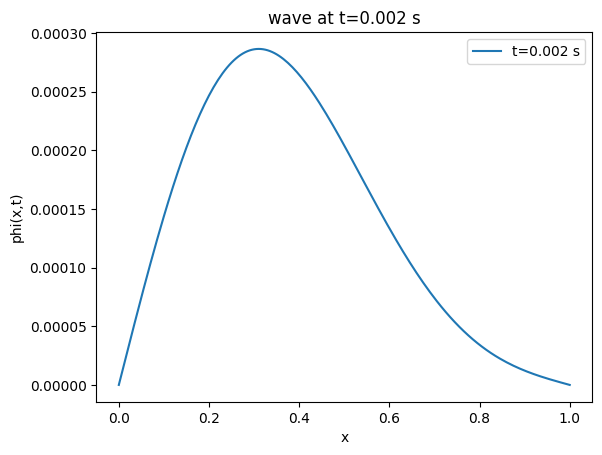

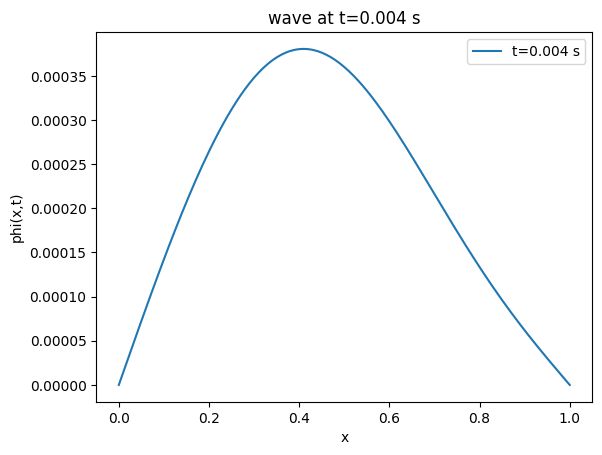

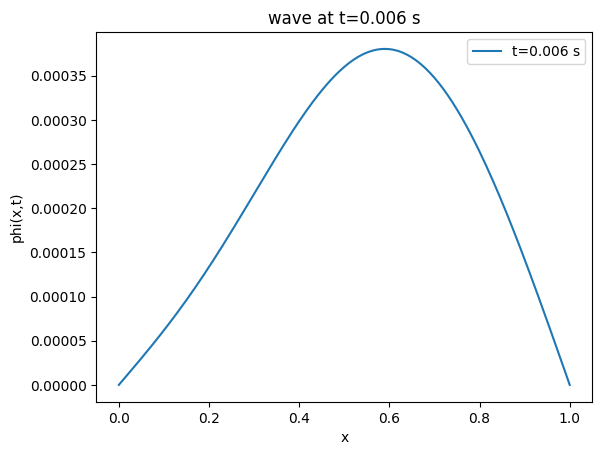

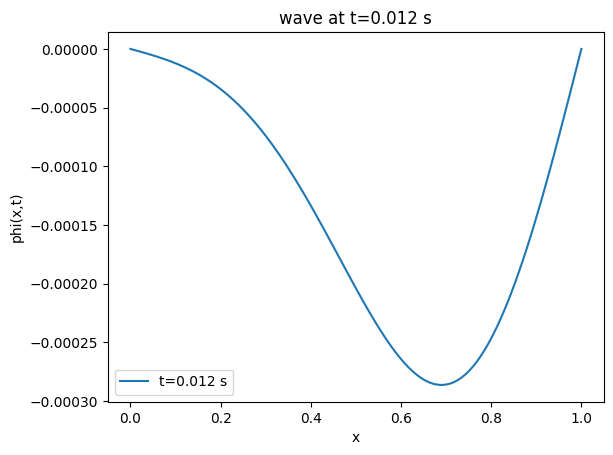

In [84]:
def CrankNicolson(v: float, x_initial: np.ndarray, v_initial: np.ndarray, a: float, h: float, N: int):
    t_list = np.linspace(0, N * h, N, endpoint=False)
    Nlattice = len(x_initial)
    x_list = np.zeros((N, Nlattice))
    v_list = np.zeros((N, Nlattice))
    x_list[0] = x_initial
    v_list[0] = v_initial

    for i in range(1, N):
        A = np.zeros((2 * Nlattice, 2 * Nlattice))
        b = np.zeros(2 * Nlattice)

        b[0] = 0
        b[Nlattice-1] = 0
        b[Nlattice] = 0
        b[2*Nlattice-1] = 0

        A[0,0] = 1
        A[Nlattice-1,Nlattice-1] = 1
        A[Nlattice, Nlattice] = 1
        A[2*Nlattice-1, 2*Nlattice-1] = 1

        for j in range(1, Nlattice - 1):
            b[j] = x_list[i - 1][j]+h/2*(v_list[i-1][j])
            A[j,j]=1
            A[j,j+Nlattice]= -h/2
        for j in range(1, Nlattice - 1):
            b[j+Nlattice] = v_list[i - 1][j]+h*v**2/(2*a**2)*(x_list[i-1][j+1]-2*x_list[i-1][j]+x_list[i-1][j-1])
            A[j+Nlattice,j+Nlattice]=1
            A[j+Nlattice,j-1]= -h*v**2/(2*a**2)
            A[j+Nlattice,j]= h*v**2/(a**2)
            A[j+Nlattice,j+1]= -h*v**2/(2*a**2)

        sol = np.linalg.solve(A, b)
        x_list[i] = sol[0:Nlattice]
        v_list[i] = sol[Nlattice:2*Nlattice]

    return (t_list, x_list, v_list)

C = 1
sigma = 0.3
d = 0.1
L = 1
a = 0.005
v = 100
h = 1e-4
tmax = 0.012
N = int(tmax / h)
N += 1

psi_function = lambda x: C * x * (L - x) * np.exp(-np.power(x - d, 2) / (2 * sigma**2)) / (L**2)
lattice = np.linspace(0, L, int(L / a) + 1)
x_initial = np.zeros(int(L / a) + 1)
v_initial = psi_function(lattice)

t_list_CN, x_list_CN, v_list_CN = CrankNicolson(v, x_initial, v_initial, a, h, N)

times = [0.002, 0.004, 0.006, 0.012]
indexes = []
for time in times:
    indexes.append(int(time / h))
for index in indexes:
    plt.plot(lattice, x_list_CN[index], label=f't={t_list_CN[index]} s')
    plt.xlabel('x')
    plt.ylabel('phi(x,t)')
    plt.legend()
    plt.title(f'wave at t={t_list_CN[index]} s')
    plt.show()

* 然后时间取以下点$t=0.2, 0.3, 0.4, 0.5$ s另做一张图画出波形，讨论你的结果：你认为这一问得到的结果在物理上是否合理？

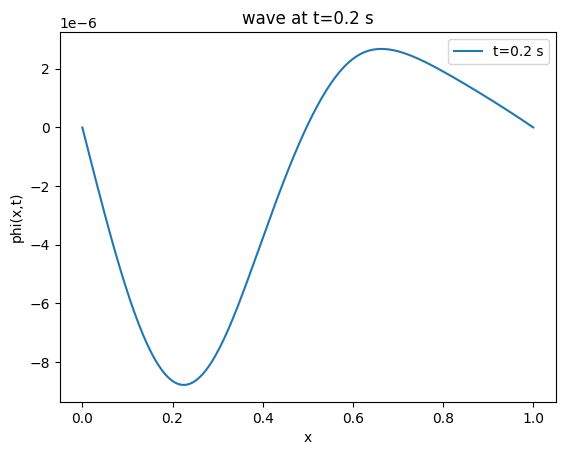

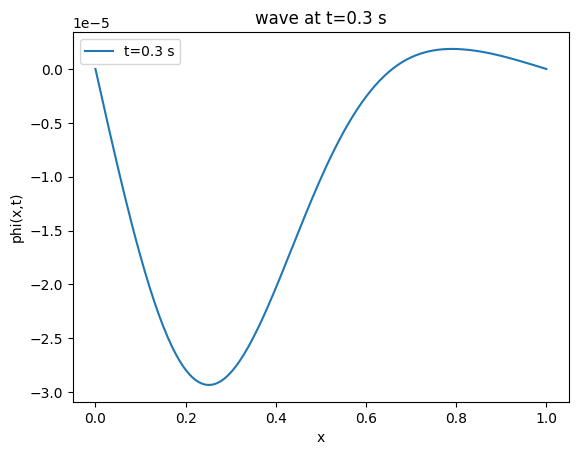

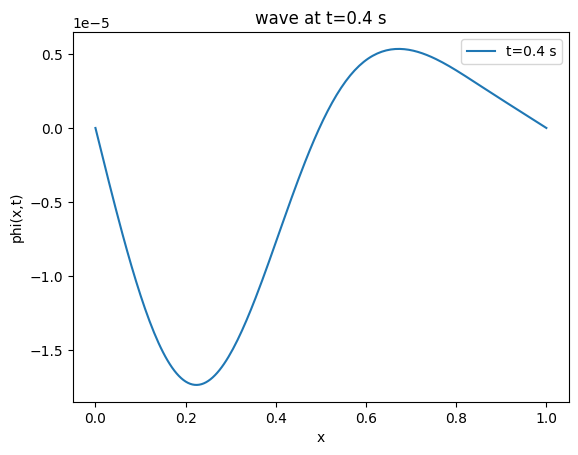

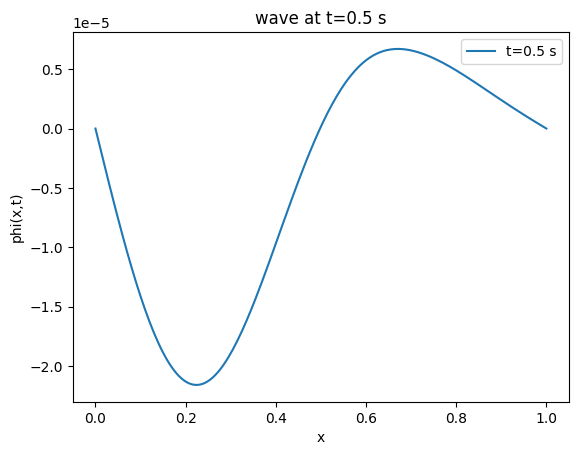

In [88]:
C = 1
sigma = 0.3
d = 0.1
L = 1
a = 0.005
v = 100
h = 1e-4
tmax = 0.5
N = int(tmax / h)
N += 1

psi_function = lambda x: C * x * (L - x) * np.exp(-np.power(x - d, 2) / (2 * sigma**2)) / (L**2)
lattice = np.linspace(0, L, int(L / a) + 1)
x_initial = np.zeros(int(L / a) + 1)
v_initial = psi_function(lattice)

t_list_CN, x_list_CN, v_list_CN = CrankNicolson(v, x_initial, v_initial, a, h, N)

times = [0.2, 0.3, 0.4, 0.5]
indexes = []
for time in times:
    indexes.append(int(time / h))
for index in indexes:
    plt.plot(lattice, x_list_CN[index], label=f't={round(t_list_CN[index],2)} s')
    plt.xlabel('x')
    plt.ylabel('phi(x,t)')
    plt.legend()
    plt.title(f'wave at t={round(t_list_CN[index],2)} s')
    plt.show()

**Bonus (c)** 

* 请编写比Crank-Nicolson更简单的隐式FTCS算法(Implicit FTCS)，重复 **(b)** 问的模拟(取$h=10^{-4}$ s)，并对结果进行锐评。你认为这一问得到的结果在物理上是否合理？

* 综合以上三问对波动方程的模拟，你觉得哪个方法的模拟结果是可靠的？你能在理论上给出解释吗？

### 作业完成情况：